In [127]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [128]:
resp_df = pd.read_csv('responses.csv')
col_df = pd.read_csv('columns.csv')
new_df = resp_df[['Finances','Gender','Village - town','Healthy eating']]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Finances          1007 non-null float64
Gender            1004 non-null object
Village - town    1006 non-null object
Healthy eating    1007 non-null float64
dtypes: float64(2), object(2)
memory usage: 31.6+ KB


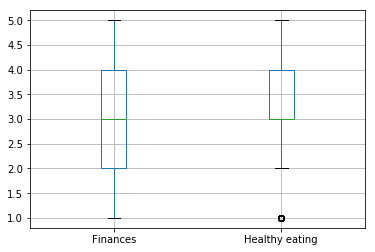

In [129]:
new_df.boxplot()

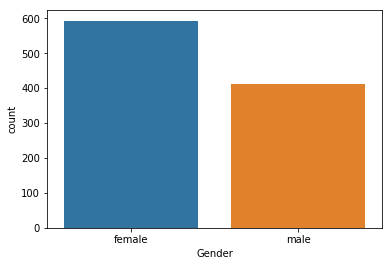

In [130]:
sns.countplot(x='Gender',data=new_df)

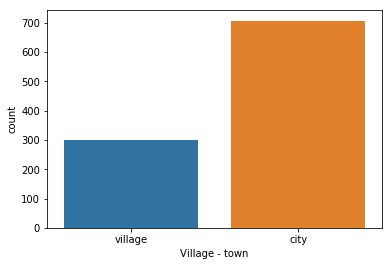

In [131]:
sns.countplot(x='Village - town',data=new_df)

In [132]:
new_df.isnull().sum()

Finances          3
Gender            6
Village - town    4
Healthy eating    3
dtype: int64

In [133]:
x=new_df.mode().iloc[0]
new_df.fillna(x,inplace=True)
new_df.isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Finances          0
Gender            0
Village - town    0
Healthy eating    0
dtype: int64

Question 1:
Finances is normally distributed. Healty-eating is left skewed. Female candidates are twice male candidates 
Candidates from City more than 2 times the number of candidates from village
The count of missing values for each column are treated with Mode of the column.

Question 2 :
  a. Is saving money (finances) gender dependant?

Null Hypothesis: Finances is not Gender Dependent

Alternate Hypothesis : Finances is gender dependent

In [134]:
m_df = new_df[new_df['Gender']=='male']['Finances']
f_df = new_df[new_df['Gender']=='female']['Finances']
t_stats,p_value = stats.ttest_ind(m_df,f_df,nan_policy='omit')
print(p_value)

0.058355189931998154


failed to reject Null Hypothesis. Thus Finances is not gender dependent

Question 2b : Is there any differences in money saving (finances) between people from city or village?

Null Hypothesis: There is no difference in money saving (finances) between people from city and village

Alternate Hypothesis : There is difference in money saving (finances) between people from city and village

In [135]:
village = new_df[new_df['Village - town']=='village']['Finances']
city = new_df[new_df['Village - town']=='city']['Finances']
t_stats,p_value = stats.ttest_ind(village,city,nan_policy='omit')
print(p_value)

0.008038213215420418


We reject Null Hypothesis. i.e we can say that There is difference in money saving (finances) between people from city and village

Question 2c : Do Women have a Healthier lifestyle than Men?

First we need to find whether there is significant difference in healthy lifestyle between male and female or not

Null Hypothesis: There is no difference in healthy lifestyle between male and female

Alternate Hypothesis : There is a significant difference in healthy lifestyle between male and female

In [136]:
m_df = new_df[new_df['Gender']=='male']['Healthy eating']
f_df = new_df[new_df['Gender']=='female']['Healthy eating']
t_stats,p_value = stats.ttest_ind(m_df,f_df,nan_policy='omit')
print(p_value)

0.04685965412880698


There is a significant difference in healthy lifestyle between male and female

boxplot of Gender against Healthy eating

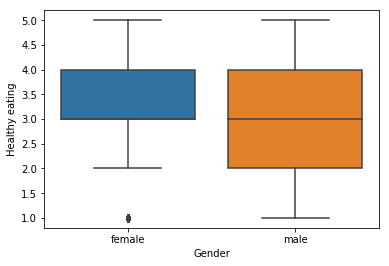

In [137]:
sns.boxplot(x="Gender",y="Healthy eating",data=new_df)

all female in Inter-Quartile range are above the 50th Quartile of male.

female have healthier lifestyle than male. Combining this with ttest we can conclude that female have a significantly healthier lifestyle than male

Question 2d : Are Village People Healthier than City People?

finding whether there is significant difference in healthy lifestyle between village and city people

Null Hypothesis: There is no difference in healthy lifestyle between village and city people

Alternate Hypothesis : There is a significant difference in healthy lifestyle between village and city people

In [138]:
v_df = new_df[new_df['Village - town']=='village']['Healthy eating']
c_df = new_df[new_df['Village - town']=='city']['Healthy eating']
t_stats,p_value=stats.ttest_ind(v_df,c_df,nan_policy='omit')
p_value

0.2864594559841501

We fail to reject the null hypothesis.

There is no difference in healthy lifestyle between village and city people.